In [1]:
# include library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# download these
# Jupyter, Jupyter Cell Tags, Jupyter Keymap, Jupyter Slide Show

In [3]:
# Read the CSV file into a DataFrame

df = pd.read_csv('data/house_price_dataset.csv')
df = df.dropna()
print(df)
y_train = np.array(df['Price'].values.tolist()) / 1000000
df = df.drop(columns=['Price'])
df['Floor_area'] = df['Floor_area'] / 1000
X_train = np.array(df.values.tolist(), dtype= np.float32)
X_feature = ['Bedrooms', 'Bathrooms', 'Floor_num', 'Floor_area', 'Price']

      Bedrooms  Bathrooms  Floor_num  Floor_area     Price
0          3.0        4.0        3.0      1960.0  39000000
1          3.0        3.0        1.0      1705.0  16900000
2          3.0        3.0        6.0      1370.0  12500000
3          3.0        3.0        4.0      2125.0  20000000
4          3.0        3.0        4.0      2687.0  47500000
...        ...        ...        ...         ...       ...
3439       3.0        3.0        8.0      1350.0   4500000
3440       2.0        2.0        7.0      1000.0   4300000
3441       3.0        3.0        9.0      1240.0   4960000
3442       3.0        3.0        9.0      1300.0   5200000
3443       3.0        3.0        8.0      1350.0   4500000

[2827 rows x 5 columns]


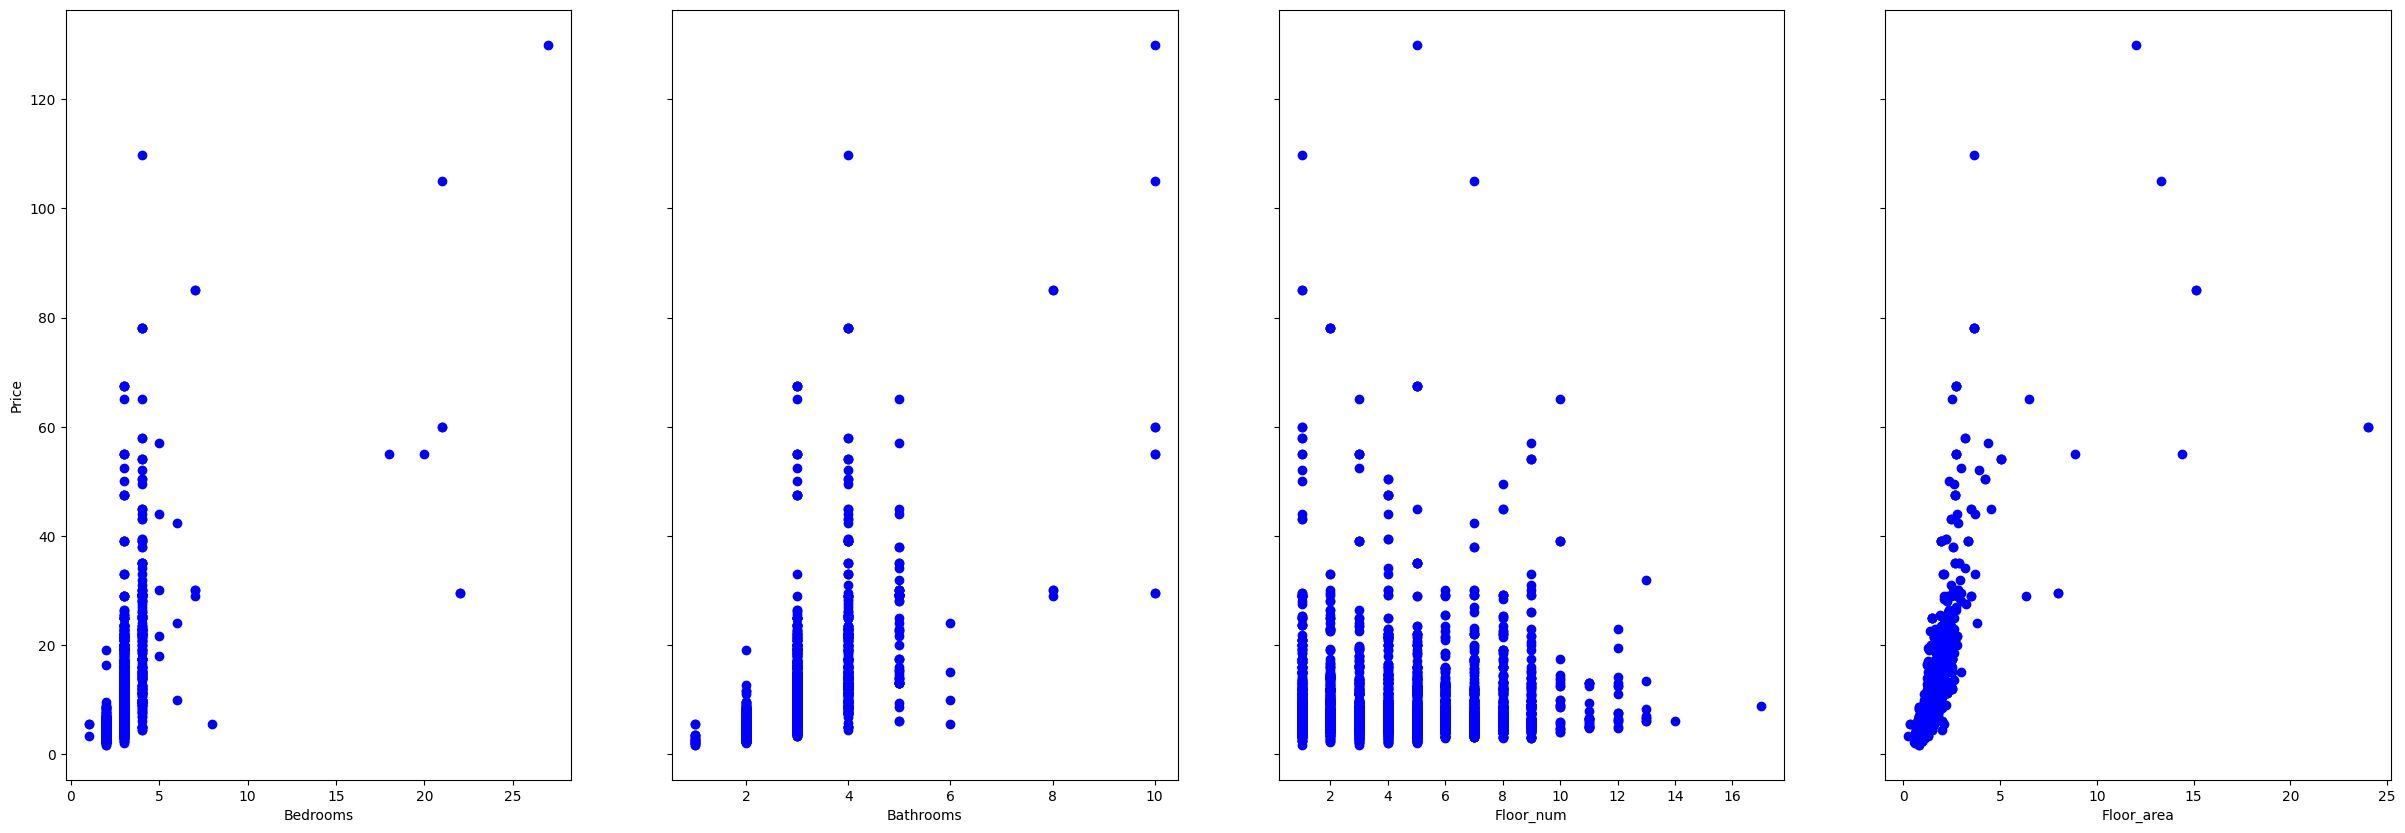

In [82]:
# draw features with right prices
figure, axis = plt.subplots(1, 4, figsize=(30,10), sharey=True)
for i in range(len(axis)):
    axis[i].scatter(df[X_feature[i]], y_train, marker='o', c='b')
    axis[i].set_xlabel(X_feature[i])

axis[0].set_ylabel("Price")
plt.show()

In [5]:
# prediction function
def prediction(X, w, b):
    predict = np.dot(X , w) + b
    return predict

In [6]:
# compute cost function
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = np.sum((np.dot(X ,w) + b - y )**2) / (2 * m)
    return cost

In [7]:
# derivatives function
def derivatives(X, y, w, b):
    m, n = X.shape
    gradient_w = np.sum(np.multiply((np.dot(X, w) + b - y)[:, np.newaxis], X), axis=0) / m
    gradient_b = np.sum((np.dot(X, w) + b - y)) / m
    return gradient_w, gradient_b

In [101]:
# gradient descent function
def gradient_descent(X, y, learning_rate, iteration=1000):
    m, n = X.shape
    w = np.random.random_sample((n,))
    b = 0

    mu = np.mean(X, axis=0)         
    sigma  = np.std(X, axis=0)                   
    X_norm = (X - mu) / sigma 

    costs = np.zeros(iteration, dtype=np.float32)
    weights = np.zeros((iteration, n), dtype= np.float32)

    for i in range(iteration):
        
        dw, db = derivatives(X_norm, y, w, b)
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        cost = compute_cost(X_norm, y, w, b)

        if i % 100 == 0:
            print(f"iteration {i} ,cost {cost}")
        
        costs[i] = cost
        
        weights[i] = w
    
    return weights, costs, w, b

In [102]:
# gradient_descent
weights, costs, w, b = gradient_descent(X_train, y_train, 0.01, iteration=1000)

iteration 0 ,cost 82.41636489857179
iteration 100 ,cost 28.600490233106402
iteration 200 ,cost 22.080380565489598
iteration 300 ,cost 20.750491838030527
iteration 400 ,cost 20.262234004127645
iteration 500 ,cost 19.98991903673554
iteration 600 ,cost 19.815295874268486
iteration 700 ,cost 19.69960858860037
iteration 800 ,cost 19.622415051756654
iteration 900 ,cost 19.57081437857571


In [103]:
# prediction
predict = prediction(X_train, w, b)

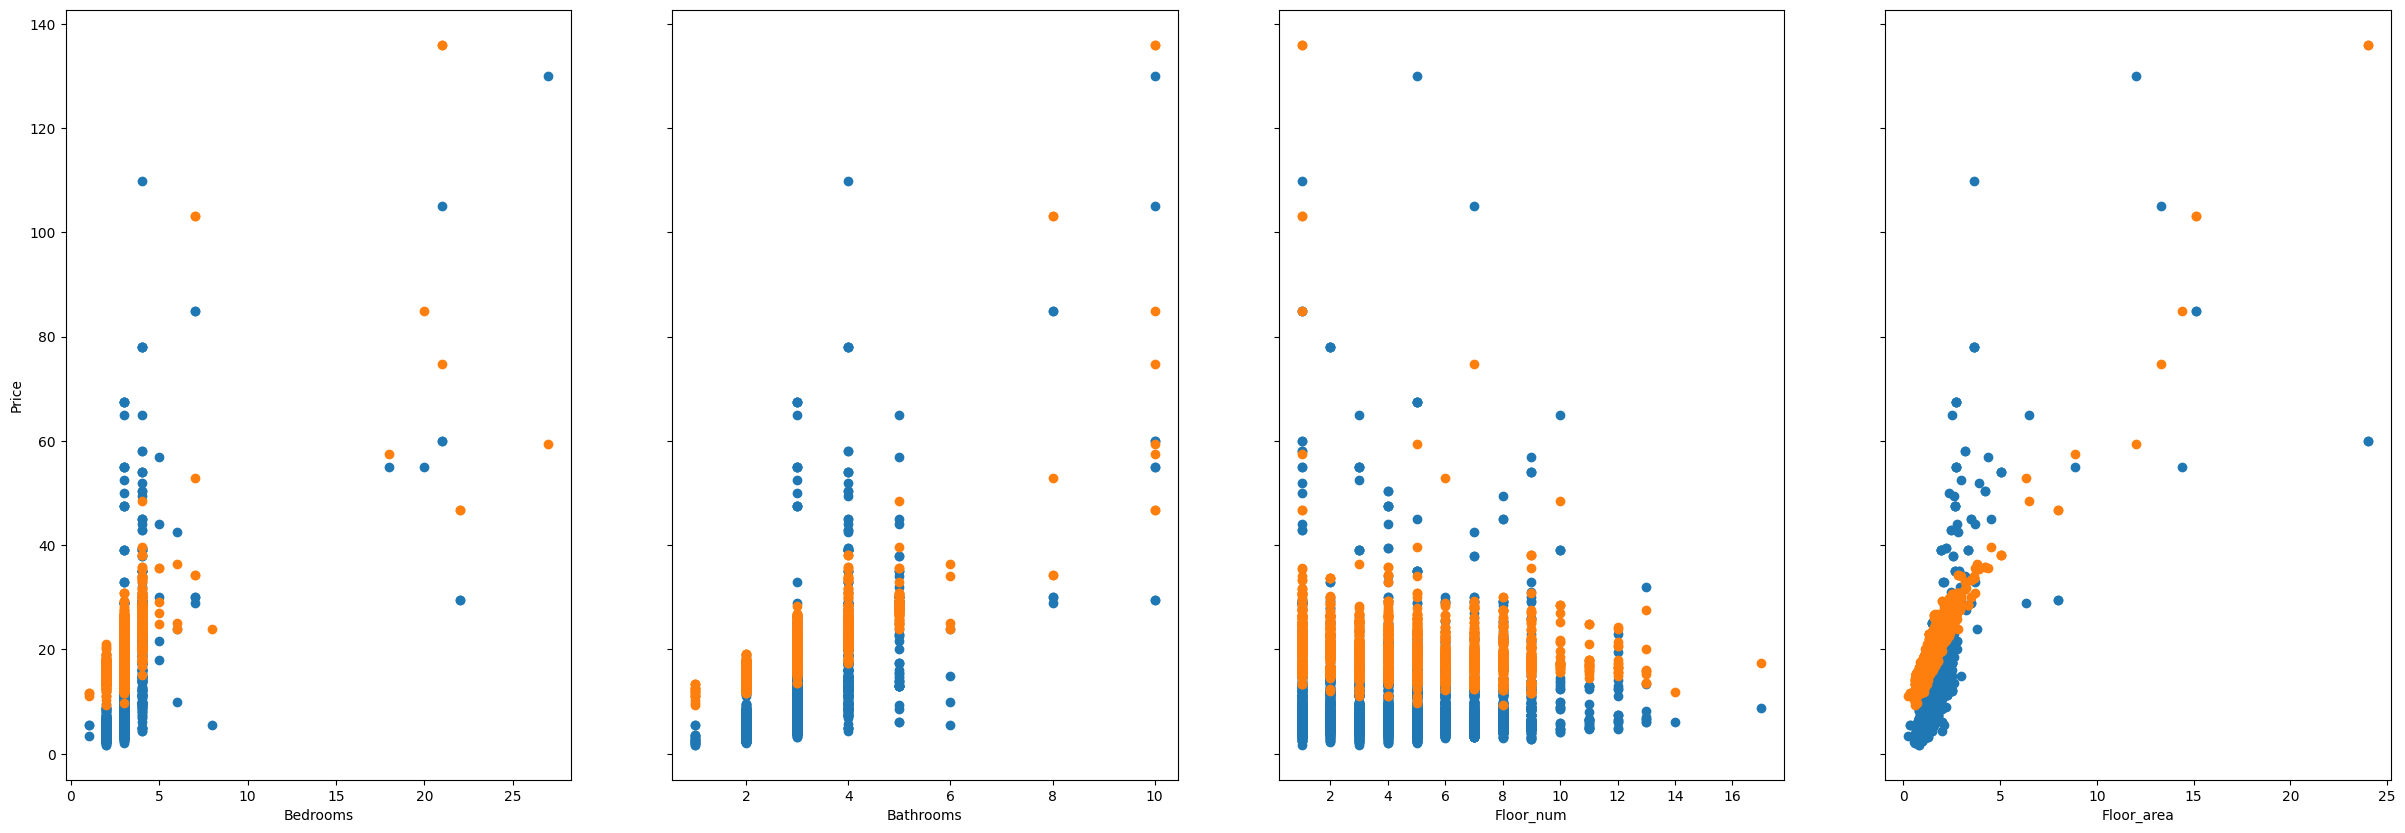

In [104]:
# draw features with right prices
figure, axis = plt.subplots(1, 4, figsize=(30,10), sharey=True)
for i in range(len(axis)):
    axis[i].scatter(X_train[:,i], y_train, marker='o')
    axis[i].scatter(X_train[:,i], predict, marker='o')
    axis[i].set_xlabel(X_feature[i])

axis[0].set_ylabel("Price")
plt.show()

In [105]:
# test prediction compared to the right answers
i = 100
print(X_train[i])
print(y_train[i] * 1000000)
print(predict[i] * 1000000)

[3.    3.    4.    2.343]
22000000.0
24442484.890993573


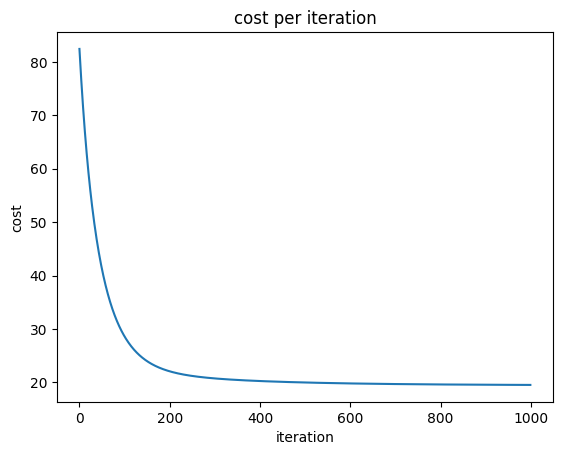

In [110]:
# draw cost per iteration
plt.plot(costs)
plt.title("cost per iteration")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.show()